<a href="https://colab.research.google.com/github/DharmeshRV/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Book Recommendation System**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Dharmesh Kumar

# **Project Summary -**

Recommender systems are used since last few decades but with the rapid digitalization - where books, news, movies, clothes and even food and grocery are available online - the recommender systems have become necessary devices in attracting the customers and helping them find the products of thier interest. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to user the right content, marhcing thier preferences) recommender systems today are unavoidable in our daily online journeys.

**1. Stating the Problem**

* Understanding the Problem
* Understanding the variables in data

**2. Data Wrangling**

* Filling the Missing Values
* Processing 'Location' values
* Merging the Dataframes
* Checking for Duplicated values


# **GitHub Link -**

https://github.com/DharmeshRV/Book-Recommendation-System

# **Problem Statement**


In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items  being movies to watch, text to read, products to buy or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

**Content**

The Book dataset contains 3 files.


● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds
import random
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading Book data
books_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter_Data Science/Capstone Projects/Book Recommendation System - Dharmesh Kumar/Books.csv')
ratings_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter_Data Science/Capstone Projects/Book Recommendation System - Dharmesh Kumar/Ratings.csv')
users_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter_Data Science/Capstone Projects/Book Recommendation System - Dharmesh Kumar/Users.csv')

### Dataset First View

In [4]:
# Books Dataset First Look
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
# Ratings Dataset First Look
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
# Users Dataset First Look
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print('Shape of books dataset is:',books_df.shape,'\nShape of ratings dataset is:',ratings_df.shape,
      '\nShape of user dataset is:',users_df.shape)

Shape of books dataset is: (271360, 8) 
Shape of ratings dataset is: (1149780, 3) 
Shape of user dataset is: (278858, 3)


### Dataset Information

In [8]:
# Books Dataset Info
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
# Ratings Dataset info
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
# Users Dataset info
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print('Duplicate rows in Books dataset are:',books_df.duplicated().sum(),
      '\nDuplicate rows in ratings dataset are:',ratings_df.duplicated().sum(),
      '\nDuplicate rows in users dataset are:',users_df.duplicated().sum())

Duplicate rows in Books dataset are: 0 
Duplicate rows in ratings dataset are: 0 
Duplicate rows in users dataset are: 0


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
print('Missing Values in Books dataset are:\n',books_df.isna().sum(),
      '\n\nMissing Values in ratings dataset are:\n',ratings_df.isna().sum(),
      '\n\nMissing Values in users dataset are:\n',users_df.isna().sum())

Missing Values in Books dataset are:
 ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64 

Missing Values in ratings dataset are:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64 

Missing Values in users dataset are:
 User-ID          0
Location         0
Age         110762
dtype: int64


Text(0.5, 1.0, ' Visualising Missing Values')

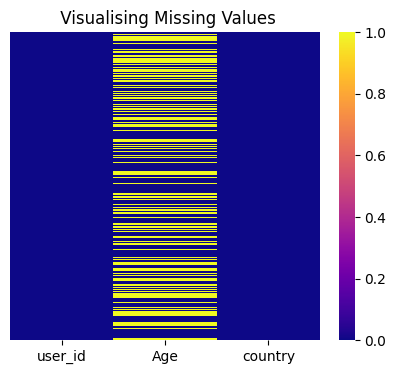

In [32]:
# Visualizing the missing values in users dataset

plt.figure(figsize=(5,4))
sns.heatmap(users_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

Using the given data we are going to develop a recommender system which would accurately give book recommendation to the users.

Books dataset has information of books in 271360 rows and 8 columns. 1 author, 2 publishers and 3 L-image-url are missing. There are no duplicated rows in the dataset.

Ratings dataset contains the book rating information in 1149780 rows and 3 columns. The dataset has no missing or duplicate value.

Users dataset contains the users info. in 278858 rows and 3 columns. The age column has 110762 many (39.7%) null values with no duplicated rows in the dataset.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
print('Columns in books dataset are:\n',books_df.columns,
      '\n\nColumns in ratings dataset are:\n',ratings_df.columns,
      '\n\nColumns in users dataset are:\n',users_df.columns)

Columns in books dataset are:
 Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object') 

Columns in ratings dataset are:
 Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object') 

Columns in users dataset are:
 Index(['User-ID', 'Location', 'Age'], dtype='object')


In [15]:
# Books Dataset Describe
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [16]:
# Ratings Dataset Describe
ratings_df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Here, in Book_Rating column 50% ratings are 0 i.e., implicitly rated books. So, we need to extract explicit ratings for better results.

In [17]:
# Users Dataset Describe
users_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


There are outliers in the age column as the min. age is 0 and max. age is 244 years.

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable in books dataset.
print(books_df.shape,'\n')
books_df.nunique()

(271360, 8) 



ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

Unique values in ISBN are more than that in Book-Title. This means some titles have multiple ISBNs because the year of release (revised editions),versions or publishing companies may be different. I'll drop the duplicated titles later if their users and ratings are same.

In [19]:
# Check Unique Values for each variable in ratings dataset.
print(ratings_df.shape,'\n')
ratings_df.nunique()

(1149780, 3) 



User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [20]:
# Check Unique Values for each variable in users dataset.
print(users_df.shape,'\n')
users_df.nunique()

(278858, 3) 



User-ID     278858
Location     57339
Age            165
dtype: int64

## ***3. Data Wrangling***

### Renaming the Columns

In [21]:
# Write your code to make your dataset analysis ready.

# first I rename the columns in the dataframes 
books_df.rename(columns={'ISBN':'isbn','Book-Title':'title','Book-Author':'author','Publisher':'publisher','Image-URL-M':'image_url_m',
                         'Image-URL-L':'image_url_l'},inplace=True)

ratings_df.rename(columns={'User-ID':'user_id','ISBN':'isbn','Book-Rating':'rating'},inplace=True)

users_df.rename(columns={'User-ID':'user_id'},inplace=True)

###Filling the Missing Values in 'author' and 'publisher' Columns 

In [22]:
# Checking the missing book-author
books_df[books_df['author'].isna()]


,isbn,title,author,Year-Of-Publication,publisher,Image-URL-S,image_url_m,image_url_l
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [23]:
# Filling the null value
books_df.loc[187689, 'author'] = 'Larissa Anne Downes'

In [24]:
# Finding missing Publishers
books_df[books_df['publisher'].isna()]

,isbn,title,author,Year-Of-Publication,publisher,Image-URL-S,image_url_m,image_url_l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [25]:
# Replacing NaNs with publisher names
books_df.loc[128890, 'publisher'] = 'NovelBooks, Inc'
books_df.loc[129037, 'publisher'] = 'NovelBooks, Inc'

### Getting the Country names of the Users

In [26]:
# Extracting the country names from users_df
for i in users_df:
    users_df['country']=users_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [27]:
# Displaying the country names
set(users_df['country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [28]:
# Correcting the misspelled country names

users_df.loc[users_df['country'].isin(['australii','autralia','western australia']), 'country'] = 'Australia'

users_df.loc[users_df['country'].isin(['texas','oakland','nyc','ohio','north carolina','houston','unite states','yanhill','united sates',
                                       'united staes','united state','united statea','united stated','america','united stated of america',
                                       'jersey','united states','united states of america','us','us of a','us virgin islands','usa  canada',
                                       'usa currently living in england','uusa','usaa','wonderful usa','california','orange co','ysa']), 'country'] = 'USA'

users_df.loc[users_df['country'].isin(['the netherlands','nederlands','netherlands','netherlands antilles','neverland','nl']),'country'] = 'netherlands'

users_df.loc[users_df['country'].isin(['in','india','indiai']),'country'] = 'India'

users_df.loc[users_df['country'].isin(['europa','europe']),'country'] = 'europe'

users_df.loc[users_df['country'].isin(['can','canada','canada eh','cananda','canda','le canada','il canada']),'country'] = 'canada'

users_df.loc[users_df['country'].isin(['geermany','germany','germay','deutsches reich','deutschland']),'country'] = 'germany'   

users_df.loc[users_df['country'].isin(['northern ireland','new london','london','england','england uk','english','united kindgdom',
                                       'united kindgonm','worcester','united kingdom','u k','west yorkshire','wales']), 'country'] = 'UK' 

users_df.loc[users_df['country'].isin(['the philippines','philippines','philippinies','phillipines','phils','phippines']),'country']='Philippines' 

users_df.loc[users_df['country'].isin(['l','1','k1c7b1','01776','02458','19104','23232','30064','85021','87510','','xxxxxx','universe','nowhere',
                                       
                                       'x','y','a','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'country'] = 'others'

users_df.loc[users_df['country'].isin([ 'italia','italien','itlay','italy']), 'country'] = 'Italy'

users_df.loc[users_df['country'].isin(['xinyu','prc','china','china öð¹ú','öð¹ú','chinaöð¹ú','chian','zhengjiang','yunling']), 'country'] = 'China'

users_df['country'].replace(['rsa','urugua','ukrain','turkei','türkiye','niger','nz','newzealand','moçambique','la belgique','la argentina','isreal','fifi',
                             'le madagascar','la france','the gambia','the netherlands','srilanka','saudia arabia','brasil','_ brasil','malaysian',
                             'hongkong','russian federation'], ['south africa','uruguay','ukraine','turkey','turkey','nigeria','new zealand','new zealand','mozambique',
                                                                'Belgium','argentina','israel','fiji','madagascar','france','gambia','netherlands',
                                                                'sri lanka','saudi arabia','brazil','brazil','malaysia','hong kong','russia'],inplace=True)
 


In [29]:
# Converting the country names to uppercase
users_df['country']=users_df['country'].str.upper()

# Dropping the 'Location' column
users_df.drop('Location',axis=1,inplace=True)

In [33]:
# Let's see the contry names
print(users_df['country'].unique())

['USA' 'RUSSIA' 'PORTUGAL' 'UK' 'CANADA' 'SPAIN' 'AUSTRALIA' 'BRAZIL'
 'OTHERS' 'GERMANY' 'MEXICO' 'CHINA' 'ITALY' 'DISTRITO FEDERAL' 'FRANCE'
 'NETHERLANDS' 'IRAQ' 'FINLAND' 'NEW ZEALAND' 'INDIA' 'GHANA'
 'SWITZERLAND' 'SLOVENIA' 'IRAN' 'PERU' 'VIETNAM' 'SRI LANKA' 'PAKISTAN'
 'DENMARK' 'BELGIUM' 'MALAYSIA' 'TURKEY' 'PHILIPPINES' 'GREECE' 'COLOMBIA'
 'NORWAY' 'KUWAIT' 'CHILE' 'QUIT' 'LJ' 'TAIWAN' 'ESPAÑA' 'SWEDEN'
 'ARGENTINA' 'NIGERIA' 'BULGARIA' 'AUSTRIA' 'ROMANIA' 'SINGAPORE'
 'ALBANIA' 'EGYPT' 'TUNISIA' 'UZBEKISTAN' 'QATAR' 'SYRIA' 'SAUDI ARABIA'
 'INDONESIA' 'SUDAN' 'POLAND' 'THAILAND' 'IRELAND' 'VENEZUELA' 'PARAGUAY'
 'MOZAMBIQUE' 'MOROCCO' 'AFGHANISTAN' 'ESTONIA' 'CLACKAMAS' 'LESOTHO'
 'YUGOSLAVIA' 'SLOVAKIA' 'COSTA RICA' 'BASQUE COUNTRY' 'ETHIOPIA'
 'CROATIA' 'ISRAEL' 'JAPAN' 'ICELAND' 'SOUTH AFRICA' 'CUBA' 'CALABRIA'
 'ALDERNEY' 'PUERTO RICO' 'HONG KONG' 'LATVIA' 'LUXEMBOURG' 'BELARUS'
 'CAPE VERDE' 'LITHUANIA' 'GUYANA' 'SCOTLAND' 'JORDAN' 'ANGOLA' 'ALGERIA'
 'ANDORRA' 'KYRGY